# **Mobile Money Fraud Detection with Ensemble Machine Learning**
* **Author:** *Stephen Adarkwah*
* **Author Date:** *20240801*
* **Version:** *1.0*
  
### Context
Mobile money fraud detection using machine learning is critical in safeguarding financial ecosystems. It involves applying advanced algorithms and data analysis techniques to identify suspicious activities and prevent real-time fraudulent transactions. An effective fraud detection system should be able to detect fraudulent transactions with high accuracy and efficiency. While avoiding bad actors from executing fraudulent transactions is necessary, ensuring genuine users can access the payment system is also critical. However, many false positives may lead to a poor customer experience, potentially driving customers to take their business elsewhere and highlighting the need for accurate fraud detection.

### Other Challenges 
 A significant challenge in building fraud detection models in research is the availability of transactional datasets due to confidentiality and data governance policies around financial data. Another major challenge in applying Machine Learning to fraud detection is the presence of highly imbalanced data sets. In many available datasets, most transactions are genuine, with a tiny percentage of fraudulent transactions. Designing an accurate and efficient fraud detection system that is low on false positives but detects fraudulent activity effectively is a significant challenge for researchers. 
 
### About Dataset 
The lack of legitimate datasets in mobile money transactions to perform fraud detection research has always been a big problem. This will leave researchers with the burden of harnessing the datasets before conducting the research. Paysim is a financial simulator that simulates mobile money transactions based on an original dataset.

PaySim is based on a sample of genuine mobile money transactions from an African country provided by a multinational company with services in over 14 countries. This synthetic approach offers a valuable resource for advancing fraud detection research. Clone PaySim source repository at https://github.com/EdgarLopezPhD/PaySim/tree/master which is a java based application.

*These fields form the basis of the synthetic dataset, providing a comprehensive view of transaction activities while offering opportunities to study and test fraud detection methods.*


### Research Goals
1. Are there limitations in using ensemble learning to combat modern-day Mobile Money fraud?
2. Can these limitations be fixed or improved?
3. Is ensemble learning an effective combatant against mobile money fraud in contrast to traditional solutions like data mining, anonymous tip lines (including online or website) and financial auditing?



#### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#### Get simulated data

In [3]:
# Loading datasets
df = pd.read_csv('./outputs/paysim.csv')

# fix column names to camel case
dataset = df.rename(columns={'oldbalanceOrg':'oldBalanceOrg', 'newbalanceOrig':'newBalanceOrig',
                             'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})
dataset.head()

,step,type,amount,nameOrig,oldBalanceOrg,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# check schema
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldBalanceOrg   float64
 5   newBalanceOrig  float64
 6   nameDest        object 
 7   oldBalanceDest  float64
 8   newBalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB



The dataset contains the following attributes:

* **step:** This is a unit of time representing one hour in the real world. The total number of steps is 744, corresponding to a 30-day simulation.

* **type:** The type of transaction performed. The possible types are *CASH-IN*, *CASH-OUT*, *DEBIT*, *PAYMENT*, and *TRANSFER*.

#### About type of transactions
* CASH-IN: Refers to depositing cash into an account (adding funds).

* CASH-OUT: Refers to withdrawing cash from an account (removing funds).

* DEBIT: It refer to a decrease in the balance of a financial account due to a withdrawal or an expense.

* PAYMENT: Refers to the transfer of money from one party (payer) to another (payee) in exchange for goods, services, or as settlement of a debt.

* TRANSFER: Refers to moving money from one account to another, often between accounts held by the same person or entity.


* **amount:** The transaction amount in your preferred local currency (£ in my case).

* **nameOrig:** The customer who initiated the transaction.

* **oldBalanceOrig:** The initial balance of the customer before the transaction.

* **newBalanceOrig:** The new balance of the customer after the transaction.

* **nameDest:** The recipient of the transaction.

* **oldBalanceDest:** The initial balance of the recipient before the transaction. There is no information for customers whose names start with "M" (merchants).

* **newBalanceDest:** The new balance of the recipient after the transaction. As with "oldbalanceDest," there is no information for customers whose names start with "M." (merchants)

* **isFraud:** Indicates whether a transaction is fraudulent.

* **isFlaggedFraud:** Flags transactions that exceed a certain threshold. In this dataset, transfers over 200,000 in a single transaction are flagged as potentially fraudulent.




I get the summarized overview of the dataset to observe the distribution/dispersion in data points.

In [5]:
# get statistics
dataset.describe()

,step,amount,oldBalanceOrg,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


The dataset has 6362620 transactions,the mean fraud is 0.00129 which means there very few fraud cases recorded ie. 13 real fraud cases every 10,000 transactions. However the number of successfully detected fraudulent transaction by the system is very low at 0.025 successful detection per 10,000 transactions. This goes to proof why we need excellent/advanced mechanisms to help detect fraud more effectively.

### Data Exploration

From experience in working in the banking for 6 years, most fraud case I have witnessed have correlations with transaction types, accounts, and amount.

Let’s see the distribution for each attribute. I will use plot visualization to get insight the dataset.

#### Fraud

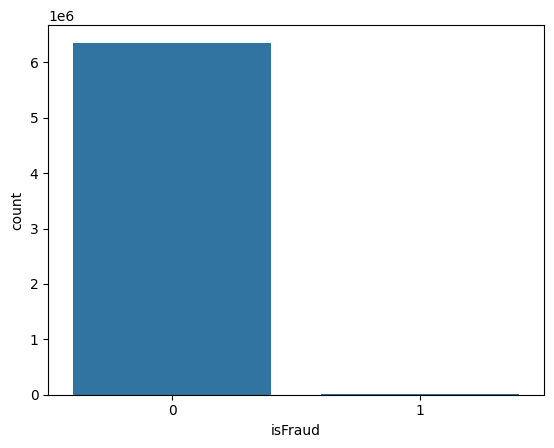

In [6]:
# Fraud

sns.countplot(x = 'isFraud',  data=dataset)
plt.show()

In [7]:
# number of actual frauds in the dataset
dataset.groupby('isFraud')['isFraud'].count()

isFraud
0    6354407
1       8213
Name: isFraud, dtype: int64

From the diagram above its almost impossible to see the number of fraud transaction due to its small value. But as we can see 8213 compared to 6354407 is very small. It's possible that frauds infrequently happens in this dataset and hence the values we are seeing is accurate.

#### Flagged Fraud

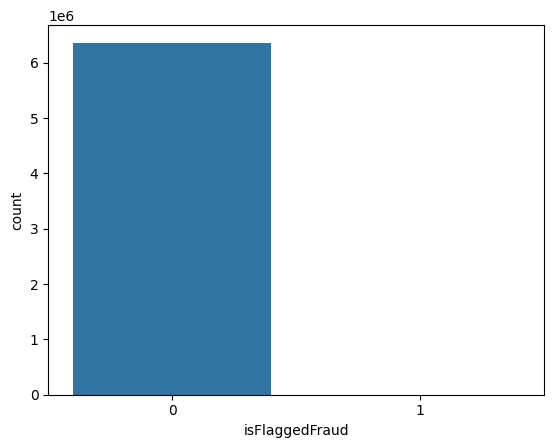

In [8]:
# successfully flagged fraud
sns.countplot(x = 'isFlaggedFraud',  data=dataset)
plt.show()

In [9]:
# number of successfully flagged frauds in the dataset
dataset.groupby('isFlaggedFraud')['isFlaggedFraud'].count()

isFlaggedFraud
0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

16 successfully detected frauds out of 8213 is a very poor performance for a fraud detection. That is 0.19% of actual fraud that occurred. This is a good case to employ advance or more competent fraud detection mechanisms for effective and efficient fraud detection.

#### Transaction Types vs Fraud

<Axes: xlabel='type', ylabel='count'>

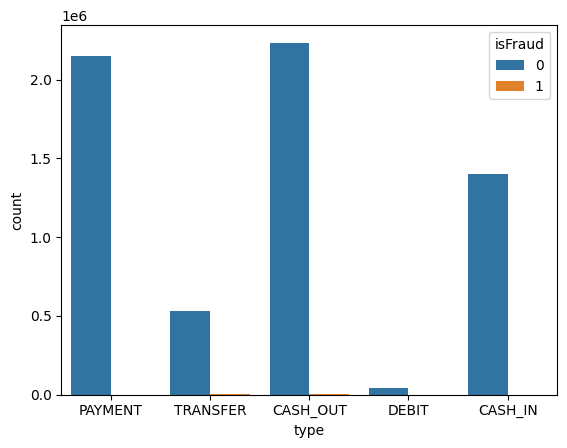

In [10]:
# Transaction Types
sns.countplot(x = 'type', hue='isFraud',  data=dataset)

In [11]:
# Get the number of fraud cases in each transaction type
dataset.groupby('type').agg(transaction_count = ('type', 'count'),
                                   isFraud =('isFraud','sum'),).reset_index()


,type,transaction_count,isFraud
0,CASH_IN,1399284,0
1,CASH_OUT,2237500,4116
2,DEBIT,41432,0
3,PAYMENT,2151495,0
4,TRANSFER,532909,4097


We can see that the **TRANSFER** and **CASH_OUT** types are mainly used to commit these fraud transactions. These transaction operations make sense because they involve an end-user physically withdrawing or moving money into an account of choice.

#### Transaction Type VS Fraud VS Flagged Fraud

In [12]:
# Get the number of fraud cases and detected cases in each transaction type
sta_df = dataset.groupby('type').agg(isFraud = ('isFraud', 'sum'),
                                   isFlaggedFraud =('isFlaggedFraud','sum'),).reset_index()


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'CASH_IN'),
  Text(1, 0, 'CASH_OUT'),
  Text(2, 0, 'DEBIT'),
  Text(3, 0, 'PAYMENT'),
  Text(4, 0, 'TRANSFER')])

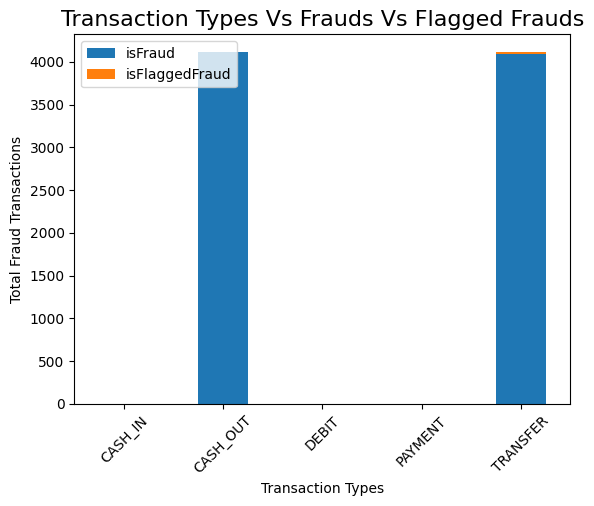

In [13]:
#create stacked bar chart for transaction_types Vs actual Fraud Vs successfully detected Fraud
sta_df.set_index('type').plot(kind='bar', stacked=True)

#add overall title
plt.title('Transaction Types Vs Frauds Vs Flagged Frauds', fontsize=16)

#add axis titles
plt.xlabel('Transaction Types')
plt.ylabel('Total Fraud Transactions')

#rotate x-axis labels
plt.xticks(rotation=45)

In [14]:
# Get the all fraud cases in each transaction type
sta_df

,type,isFraud,isFlaggedFraud
0,CASH_IN,0,0
1,CASH_OUT,4116,0
2,DEBIT,0,0
3,PAYMENT,0,0
4,TRANSFER,4097,16


From the chart above you can see that successfully detected fraud is a small fraction of the total fraud cases and occurred for **TRANSFER** type transactions only. This makes sense because if there are policies/rules like KYC system check it is harder to detect **CASH_OUT** because it involves a lot human element which is uncontrolled especially when it has to do with mobile money. Social engineering are means fraudsters use to get confidential information from customer, end with that can initiate withdrawals easily.
**CASH_OUT** fraud is almost impossible to also revert as well because, when the money is removed from the account it cannot be tracked, while **TRANSFER** is likely be detected because account to account transactions can be tracked and policies governing accounts flag these transactions easily.

#### Accounts Vs Fraud

Accounts usually have correlations to fraud, fraud detection system monitor and flag certain account due to the type of amount the account sends and receives respectively or by other factors. Example **CASH_OUT** transaction type source accounts (**nameOrig**) can normally be the destination account for a previous **TRANSFER** type transaction.

In [15]:
# Was a CASH_OUT transaction source account(nameOrig) previously used as 
# TRANSFER transactions destination account?

actual_fraud = dataset.loc[dataset['isFraud'] == 1]
actual_fraud.head()

,step,type,amount,nameOrig,oldBalanceOrg,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [16]:
# Fraud transaction (isFraud = 1)
cash_out__fraud_tx = actual_fraud.loc[actual_fraud['type'] == 'CASH_OUT']
transfer_fraud_tx = actual_fraud.loc[actual_fraud['type'] == 'TRANSFER']

# test if there are any CASH_OUT source account in a TRANSFER transaction destination account
intersected_accounts = pd.merge(cash_out__fraud_tx, transfer_fraud_tx, how='inner', on=['nameOrig','nameDest'])
intersected_accounts

,step_x,type_x,amount_x,nameOrig,oldBalanceOrg_x,newBalanceOrig_x,nameDest,oldBalanceDest_x,newBalanceDest_x,isFraud_x,isFlaggedFraud_x,step_y,type_y,amount_y,oldBalanceOrg_y,newBalanceOrig_y,oldBalanceDest_y,newBalanceDest_y,isFraud_y,isFlaggedFraud_y


An empty result shows that there are no **TRANSFER** destination accounts used as source accounts for **CASH_OUT** transaction. This might mean that cases for **CASH_OUT** and **TRANSFER** transactions is unrelated.

#### Amount Vs Fraud

While working with **AMOUNT** I realised that the data points is quit large, takes a long time to compute and execute, also observations will be too clattered. So I am going to use just a sample size for the following analysis. In sampling the dataset I will use stratified approach to hopefully reduce bias in the sampled population(data points).   Transactions types looks like the most logical attribute to split the population. 

Check how transactions are distributed across the types **CASH_OUT, TRANSFER, CASH_IN, DEBIT, PAYMENT**

In [17]:
# Check unique values and their counts 
# for the column 'type'
dataset['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

/Users/stephen.adarkwah/jobs/edinbrugh/dissertation/research/momo-fincrime/.venv/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/stephen.adarkwah/jobs/edinbrugh/dissertation/research/momo-fincrime/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


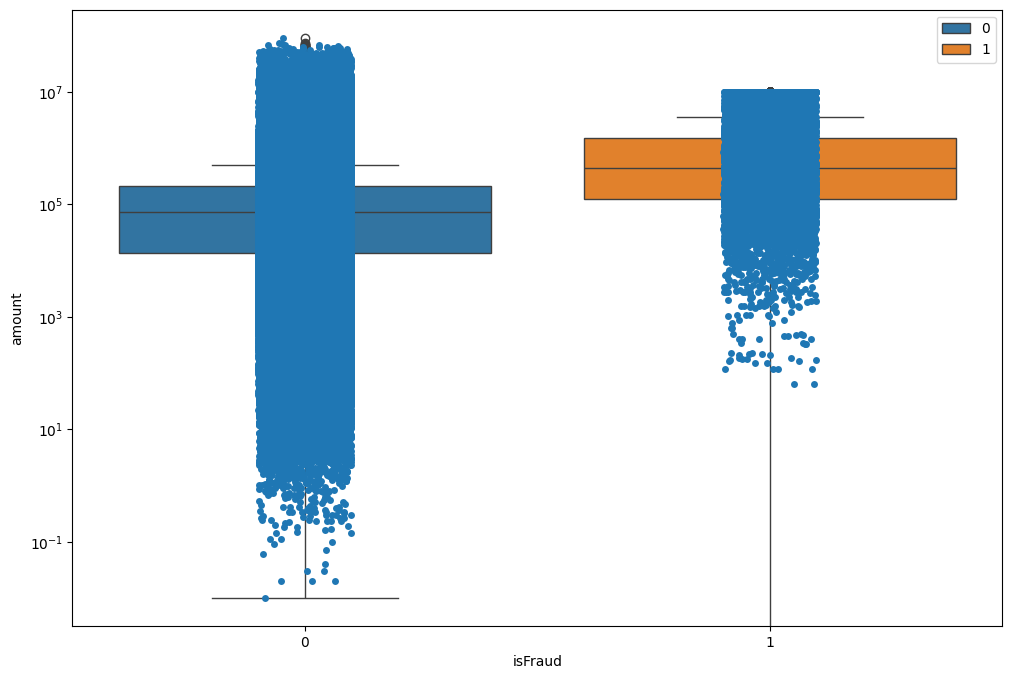

In [28]:
df = dataset
plt.figure(figsize=(12,8))
sns.boxplot(x = 'isFraud', y = 'amount', data = df, hue='isFraud')
sns.stripplot(x = 'isFraud', y = 'amount', data = df)
plt.yscale('log')

Let’s convert these raw numbers into proportions using the normalize=True parameter.

In [34]:
# Get ratio instead of raw numbers using normalize=True
expected_ratio = dataset['type'].value_counts(normalize=True)

# Round and then convert to percentage
expected_ratio = expected_ratio.round(4)*100

# convert to a DataFrame and store in variable 'type_ratios'
# We'll use this variable to compare ratios for samples
# selected using SRS and Stratified Sampling
type_ratios = pd.DataFrame({'Expected':expected_ratio})
type_ratios

,Expected
type,
CASH_OUT,35.17
PAYMENT,33.81
CASH_IN,21.99
TRANSFER,8.38
DEBIT,0.65


This is the percentage of rows we have for each transaction type. I expect a sample from this dataset to have a similar distribution across types.

In [35]:
# Implementing Stratified Sampling which maintains the population group ratios
stratified_sample = dataset.groupby('type').apply(
    lambda x: x.sample(frac=0.20)
)
# Remove the extra index added by groupby()
stsp = stratified_sample.droplevel(0)

stsp.head()

/var/folders/cd/4mt_2w5167n0gyldyrqhm7gw0000gn/T/ipykernel_3258/1567290717.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = dataset.groupby('type').apply(


,step,type,amount,nameOrig,oldBalanceOrg,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
5041644,354,CASH_IN,259032.98,C796937315,30058.00,289090.98,C14504965,180610.72,0.00,0,0
3666713,276,CASH_IN,112574.26,C1895477595,21103831.96,21216406.21,C989436891,279807.69,167233.44,0,0
5795823,401,CASH_IN,66486.81,C330597288,9723306.70,9789793.52,C1332487292,545646.38,479159.57,0,0
1494913,142,CASH_IN,79614.52,C32897646,241775.29,321389.81,C1874560636,242114.27,162499.76,0,0
5955812,405,CASH_IN,262471.99,C51637396,26873407.57,27135879.56,C110247497,1736715.65,1474243.66,0,0


The sample looks good now.
Next, I calculate the proportion by each type for this sample.

In [36]:
# Ratio of selected items by the type
stratified_ratio = stsp['type'].value_counts(normalize=True)
# Convert to percentage
stratified_ratio = stratified_ratio.round(4)*100
# We did stratified sampling. So give it proper name
stratified_ratio.name = 'Stratified'

result_ratios = pd.concat([type_ratios, stratified_ratio], axis=1)
result_ratios

,Expected,Stratified
type,,
CASH_OUT,35.17,35.17
PAYMENT,33.81,33.81
CASH_IN,21.99,21.99
TRANSFER,8.38,8.38
DEBIT,0.65,0.65


The proportions generated by the Stratified Sampling look much better

Text(0.5, 1.0, 'zoomed amount vs Fraud')

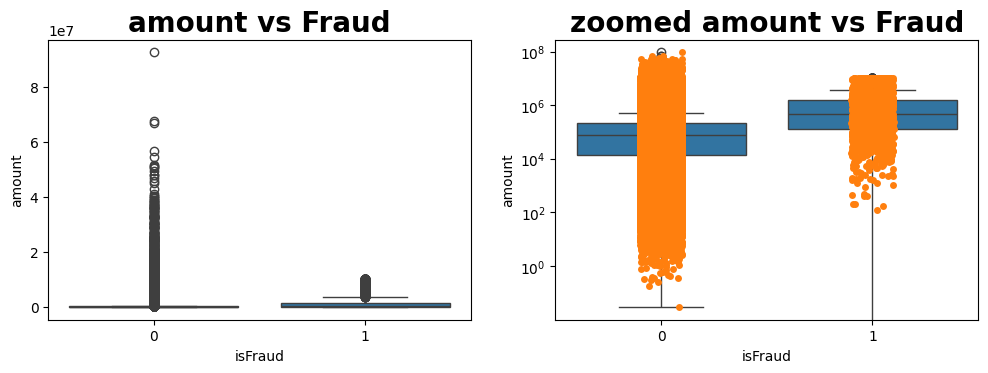

In [37]:
# Observing Amount to actual Fraud dispersion
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(x=stsp.isFraud, y=stsp.amount, data=stsp)
# adding data points
plt.title('amount vs Fraud',fontweight="bold", size=20)

# Zoomed plot
plt.subplot(2,2,2)
sns.boxplot(x=stsp.isFraud, y=stsp.amount, data=stsp)
sns.stripplot(x=stsp.isFraud, y=stsp.amount, data=stsp) 
plt.yscale('log')
plt.title('zoomed amount vs Fraud',fontweight="bold", size=20)


Both Non-fraud and fraud transactions has very high amounts appearing as outliers. Customers performed a lot of transactions in the lower 75% between the mean and the min. This makes sense as  bulk of daily transactions are not high amounts. Same goes for fraud transactions as well, but in comparison fraud transactions are mostly higher amount to non-fraud transactions. You can see that **isFraud=1** has a higher mean than **isFraud=0**. This could also be the fact that we have very little fraud transactions compare to non-fraud.


#### Amount Vs Type Vs Fraud

/var/folders/cd/4mt_2w5167n0gyldyrqhm7gw0000gn/T/ipykernel_3258/1655985199.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(hue = stsp.isFraud, x = stsp.type, y = df.amount, data = stsp[df.amount < 1e5])


Text(0.5, 1.0, 'zoomed Amount vs Types vs Fraud')

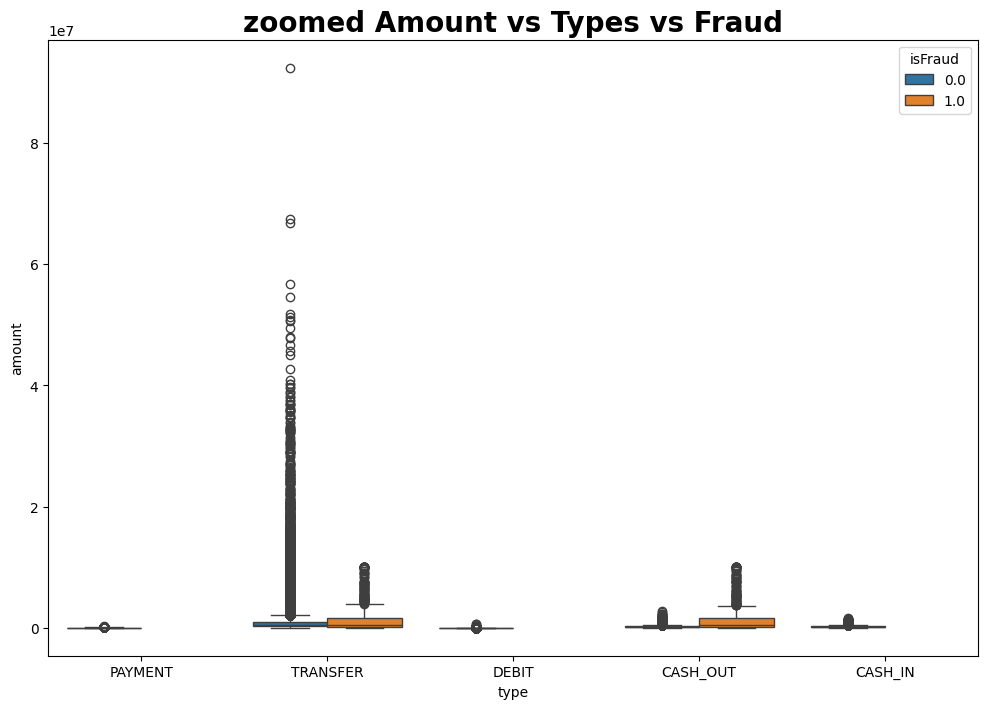

In [40]:
plt.figure(figsize=(12,8))
sns.boxplot(hue = stsp.isFraud, x = stsp.type, y = df.amount, data = stsp[df.amount < 1e5])
plt.title('zoomed Amount vs Types vs Fraud',fontweight="bold", size=20)


When dealing with banking datasets that include fraud transactions, it’s crucial to choose models that can handle imbalanced data and provide high accuracy in detecting fraudulent activities. Here are some of the best machine learning models commonly used for fraud detection:

XGBoost (Extreme Gradient Boosting): Known for its high performance and ability to handle imbalanced datasets effectively. It often achieves high accuracy and precision in fraud detection tasks1.

Random Forest: This ensemble method is robust and can handle large datasets with many features. It is also effective in dealing with imbalanced data by using techniques like class weighting2.

Gradient Boosting Machines (GBM): Similar to XGBoost, GBM is another powerful ensemble method that can provide high accuracy and is effective in detecting fraud2.

Logistic Regression: While simpler than ensemble methods, logistic regression can be very effective, especially when combined with techniques to handle class imbalance, such as SMOTE (Synthetic Minority Over-sampling Technique)2.

Neural Networks: Deep learning models, particularly those with multiple layers (e.g., Multi-Layer Perceptron), can capture complex patterns in data. However, they require more data and computational resources2.

Support Vector Machines (SVM): Effective for classification tasks, especially with a clear margin of separation. SVMs can be tuned to handle imbalanced datasets2.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Load your banking data
data = pd.read_csv('your_data.csv')

# Assuming 'target' is the column name for the target variable
X = data.drop('target', axis=1)
y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to create the neural network model
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(12, input_dim=X_train.shape, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define the models and their hyperparameters for tuning
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'NeuralNetwork': KerasClassifier(build_fn=create_model, verbose=0)
}

param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'NeuralNetwork': {
        'batch_size': [10, 20],
        'epochs': [10, 50],
        'optimizer': ['adam', 'rmsprop']
    }
}

# Perform GridSearchCV for each model
best_models = {}
for model_name in models:
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(estimator=models[model_name], param_grid=param_grids[model_name], cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Evaluate the best models on the test set
for model_name in best_models:
    model = best_models[model_name]
    y_pred = model.predict(X_test)
    if model_name == 'NeuralNetwork':
        y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Metrics for {model_name} on test set:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")
